In [1]:
NAME = "Ciprian Tudor"
COLLABORATORS = "n/a"

# Python assignment - Volume Based Trading Algorithm

|Name|SNR|UNR|
|----|---|----|
|Ciprian Tudor|2029809|u199950|


## Abstract

Using the volume and price information of 3 stocks for the past year, I propose an algorithm which calculates an index and buys or shorts when a chosen critical value is exceeded. Based on the economic theory of information markets, formulas are constructed which account for relative changes in the volume traded and associated price fluctuations. The program is used for predictive price analysis to varied degrees of success. The highest returns on investment occurr in "banded variability" markets, or stocks that vary within a fixed range, best example of which would be the foreign exchange market. While the sample set has a limited amount of data due to computational constrains, it nonetheless provides an interesting exercise in technical stock analysis. Lastly, several features of the program could provide real-world recommendations in the form of technical information. 

# Table of Contents:

## Section 1 - [Research Question](#Research Question) 

## Section 2 - [Motivation](#Motivation)

 
 
 

## Section 3 - [Methodology](#Methodology)

#### 3.0 [Formulas](#forms)

#### 3.1 [Program Functions](#Program Sections)
    
#### 3.2 [Hypotheses](#Hypotheses)
    
#### 3.3 [Preview of Answers](#Preview of Answers and Discussion)
    
#### 3.4 [Data](#Data)
    
#### 3.5 [Python Code](#Python Code)
    
3.5 a) [Historical Index Values](#Histindex)
        
3.5 b) [Current Day Index](#Cindex)
        
3.5 c) [Algorithm for Hypotheses Testing and Sensitivity Analysis](#algo)
        
## Section 4 -  [Results and Sensitivity Analysis](#results)

## Section 5 - [Conclusions and Discussion](#conclusion)

## Section 6 - [Bibliography](#bib)

# 1. Research Question <a class="Research Question" id="Research Question"></a>

How can accounting for the traded volume of a stock be used in predictive price analysis?

# 2. Motivation <a class="Motivation" id="Motivation"></a>

   In the stock market, there are perhaps as many trading methods as there are traders. While supporters of the fundamentals method, i.e. checking the economic factors of a specific commodity, company, or country, hold their approach dear, a significant amount of technical traders are proving that it is possible to turn a profit using none of this information. The latter group simply uses the data available in the market, price and volume, to generate a wealth of metrics that aids them in the decision to enter the market. In my opinion this is extremely fascinating. Most likely, this approach to trading functions well due to the fact that in a stock market, a profit is turned not necessarily due to the reality of changes in the value of a stock, but due to changes in the expectations of traders for this stock and its corresponding price incorporation. In other words, a technical trader does not need to know anything about the stock being traded, but simply account for the information other traders display and adjust to this. In order to do this, something that is often overlooked in technicals trading is the importance of volume. To address this, I attempt to incorporate a metric for relative changes in volume traded in order to discern the weight of changes in the value of the stock. 

# 3. Methodology <a class="Methodology" id="Methodology"></a>

 The method is based on the idea that the stock market works similarly to an information market. In economic terms, an information market (a.k.a. decision market or prediction market) is a way for agents to place a bet on the future occurence of an event. Thus, in the stock market, agents are betting on the future change of a stock, i.e. shorting if they believe the price to go down or buying if they believe the price to go up. Essentially, the number of shares bought (the volume traded) is an indication of the "weight" of all "bets" agents place. As such, accounting for volume and incorporating this information in price analysis might be paramount for accurate forecasting. 
   
   Simply put, the method at hand accounts for how the current volume traded compares relative to the average volume traded over a period selected by the user (normally 4 to 8 day moving averages). By doing so, any change in the value of the stock is discounted for the amount of agents that support this move.
   
   Ultimately, an index is calculated by comparing the length and price change of a current positive or negative timespan to the length and price change of past timespans. The information of length and price changes for a timespan is summarized by computing a so-called Price Period Vector, as will later be detailed. 

## 3.0 Formulas <a class="forms" id="forms"></a>

   The calculations are performed using a common averaging factor F, with which moving average volume and moving average changes in price are computed for each period t.   
   Formula (1.0) computes the change in price from the last period to the current one. Formulas (1.1) and (1.2) compute the moving averages for volume and the change in price with a common averaging factor F. Lastly, in (1.3) the volume support is calculated, which reflects the importance of the current period compared to the last F periods.
   
   (1.0) Change in Price:
   \begin{equation*}
   D_t = Price_t - Price_{t-1}
   \end{equation*} 
   
   (1.1) Moving Average Change in Price:
   \begin{equation*}
   AD_t = \frac{ \sum_{t-F}^t D_t} {F}
   \end{equation*} 
   
   (1.2) Moving Average Volume:
   \begin{equation*}
   AV_t = \frac{ \sum_{t-F}^t Volume_t} {F}
   \end{equation*} 
   
   (1.3) Volume Support:
   \begin{equation*}
   VS_t = \frac{Volume_t}{AV_t}
   \end{equation*} 
   
   Next, I establish the notation for counters, which keep track of the number and length of positive or negative periods.
   
   \begin{equation*}if   AD_t > 0 \end{equation*} 
   \begin{equation*}P_{n, m, +} = 1, 2, ..., m  \end{equation*} 
   Such that n identifies separate timespans (days, weeks) where AD is positive, and m identifies each separate day within such timespans. For example:
   
   First positive timespan:
   \begin{equation*} P_{1, m, +}   \end{equation*} 
   Second positive timespan:
   \begin{equation*} P_{2, m, +}   \end{equation*} 
   Nth positive timespan:
   \begin{equation*} P_{n, m, +}   \end{equation*} 
   And within these there is a first day of first positve timespan:
   \begin{equation*} P_{1, 1, +}   \end{equation*} 
   Second day of first positive timespan:
   \begin{equation*} P_{1, 2, +}   \end{equation*} 
   Mth day of nth positive timespan:
   \begin{equation*} P_{n, m, +}   \end{equation*} 
   
   The converse happens for negative timespans:
   \begin{equation*}if   AD_t < 0 \end{equation*} 
   \begin{equation*}P_{n, m, -} = 1, 2, ..., m  \end{equation*} 
    
   Lastly, the index is calculated. In formulas (2.0) and (2.1), within a positive or negative period, I discount the change in price and the timeframe over which it happens by the volume support.
   
   (2.0) Volume Adjusted Period Counter:
   \begin{equation*}
   VAP_{t, n, m} =  \sum_{t-m}^t VS_t 
   \end{equation*} 
   
   (2.1) Volume Adjusted Average Change in Price:
   \begin{equation*}
   VAD_t = VS_t * AD_t
   \end{equation*} 
   
   
   Formula (2.2) shows the calculation of a price period vector, which measures the length of a positive/negative price period and how supported it is by the market. 
   
   (2.2) Price Period Vector:
   \begin{equation*}
   PPV_t = { VAP_t * VAD_t }
   \end{equation*} 
   
   Next, in (3.0), for each separate positive/negative period, an average price period vector is calculated. Lastly, in (3.1) the index is calculated by comparing the current period's average vector with that of past periods. The exact number of past periods is inputed by the user as a parameter "lookback". 
   
   
   
   (3.0) Average Price Period Vector:
   
   \begin{equation*}
   APPV_{t, n, m} = \frac{ \sum_{t-m}^t PPV_t} {m}
   \end{equation*} 
   
   (3.1) Trade Index:
   
   \begin{equation*}
   Index_t =  {APPV_{t, n, m } / \left( \frac{ \sum_{n-lookback}^{n-1} APPV_{n}} {lookback} \right)}
   \end{equation*} 
   
   \begin{equation*}
   \end{equation*} 
 

# 3.1 Program Functions <a class="Program Sections" id="Program Sections"></a>

The program features 3 main sections:

   Section a) A list of historical index values is calculated for the inputted data set. This is later used to generate a hypothetical portfolio.
    
   Section b) An index for the current day, based on user inputted price, is calculated. This is useful in aiding the decision to potentially enter the market.
    
   Section c) A hypothetical portfolio is calculated based on user inputted parameters. This is used to test hypotheses, as well as run sensitivity analysis. 
  

# 3.2 Hypotheses: <a class="Hypotheses" id="Hypotheses"></a>

1. The average amplitude of actions taken by agents in a positive or negative period remains relatively consistent across the medium term (weeks to months), within a certain stock. This will be tested by judging the profitability of closed positions.

2. The algorithm will work best for stocks exhibiting "banded variability", i.e. stocks that vary up and down within a certain range of values. This is most often seen in the case of foreign exchange markets. However, the FOREX market is missing freely available volume information, so I will proxy for this behaviour by using other stocks. This hypothesis will be tested by checking which stock had the highest return on investment.

### Technical Assumptions:

For calculating the present day index, it is assumed that the inputted price has an average volume support, i.e. of 1, but in reality that is not the case. An inability to account for current volume traded arises out of the inavailability of stock market information in the current day when one would make a move. 

It is also assumed that within a certain day, we are able to buy at the VWAP estimate, i.e. the average price of the day. While this may not always be the case, it holds that on average over the long term, we will in fact buy at this "average" price.

# 3.3 Preview of Answers: <a class="Preview of Answers and Discussion" id="Preview of Answers and Discussion"></a>

1. Profitability of closed positions had too large a variance for a definitive conclusion to be reached. However, in 2 out of the 3 stocks, closed positions were profitable, though for a restricted range of parameters. Overall, most historical portfolios had a negative return on investment.

2. The algorithm does seem to work best for "banded variability" stocks, this can be seen by a consistently positive return on investment across 18 instances of parameter values for the stock in question. The average return was 25.4%


To provide context and compare these values to what real traders would make, I display data from  Aspadarec (2013) -  "Investment Performance of Hedge Funds". Here he computes the average return on investment of hedge funds for the period 1997-2012, based on Barclays Data. The highest value (36.6%) occurred in 1999 due to the technological boom, while the lowest one (-21.6%) occurred in 2008 because of the financial crisis. This can be seen in the figure below:

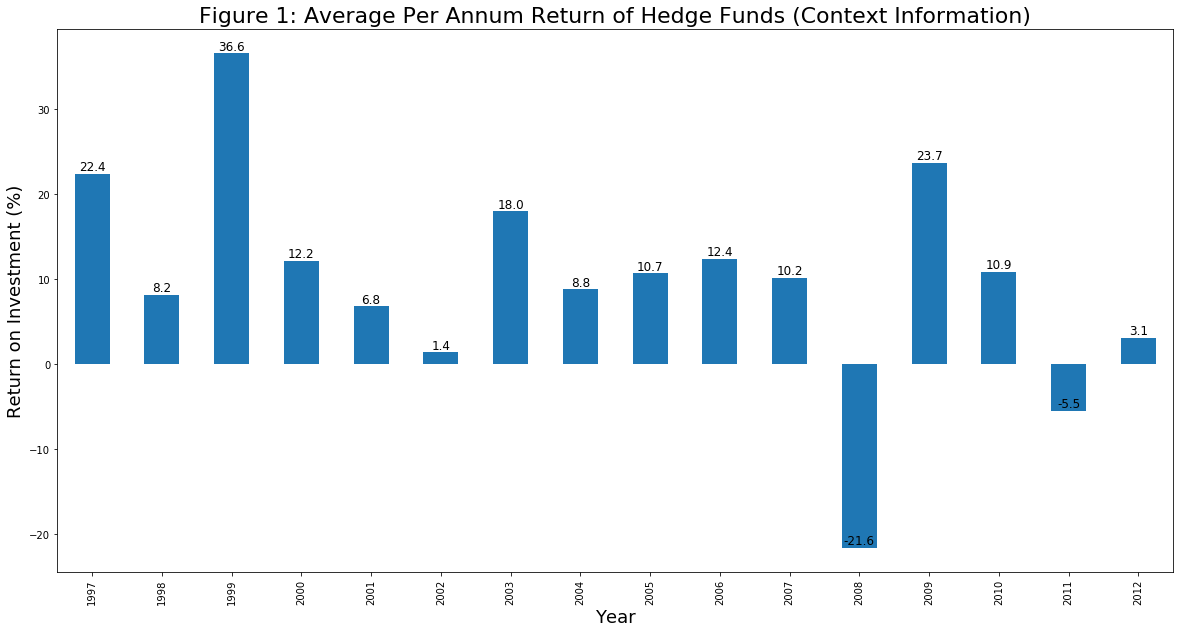

In [119]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd

year = [1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]
returns = [22.4, 8.2, 36.6, 12.2, 6.8, 1.4, 18.0, 8.8, 10.7, 12.4, 10.2, -21.6, 23.7, 10.9, -5.5, 3.1]

returns_series = pd.Series.from_array(returns)

plt.figure(figsize=(20, 10))
ax = returns_series.plot(kind='bar')
ax.set_title('Figure 1: Average Per Annum Return of Hedge Funds (Context Information)', fontsize = 22)
ax.set_xlabel('Year', fontsize = 18)
ax.set_ylabel('Return on Investment (%)', fontsize = 18)
ax.set_xticklabels(year)

find = ax.patches

for find, label in zip(find, returns_series):
    height = find.get_height()
    ax.text(find.get_x() + find.get_width() / 2, height, label, ha='center', va='bottom', fontsize = '12')
plt.show()


# 3.4 Data: <a class="Data" id="Data"></a>

The data is price and volume information of 3 stocks from the New York Stock Exchange or Nasdaq, obtained from the Yahoo Finance website. 

Netflix: https://finance.yahoo.com/quote/NFLX/history?p=NFLX

General Motors: https://finance.yahoo.com/quote/GM/history?p=GM

TerraForm Power: https://finance.yahoo.com/quote/TERP/history?p=TERP

Variables: Opening price, Closing price, Highest Price, Lowest price, Volume traded

Time Period: 07/2019 - 07/2020

Ideally I would use VWAP - volume weighted average price, i.e. the weighted price based on the volume a stock traded in each trade of the current day. However, obtaining the VWAP requires paid services such as a Bloomberg terminal. I use the next best estimate for VWAP which is an average between Highest, Lowest, and Closing prices.

The above 3 stocks were selected because they show different overall price trends for the past year. By running the program across this variety of situations, I can test the hypotheses and formulate overall conclusions about profitability. 

In Figure 2, I display the Netflix stock showing year to year growth. Large spikes in the volume traded occurr both during positive and negative price changes. This may indicate that certain price movements are more supported by the market than others.

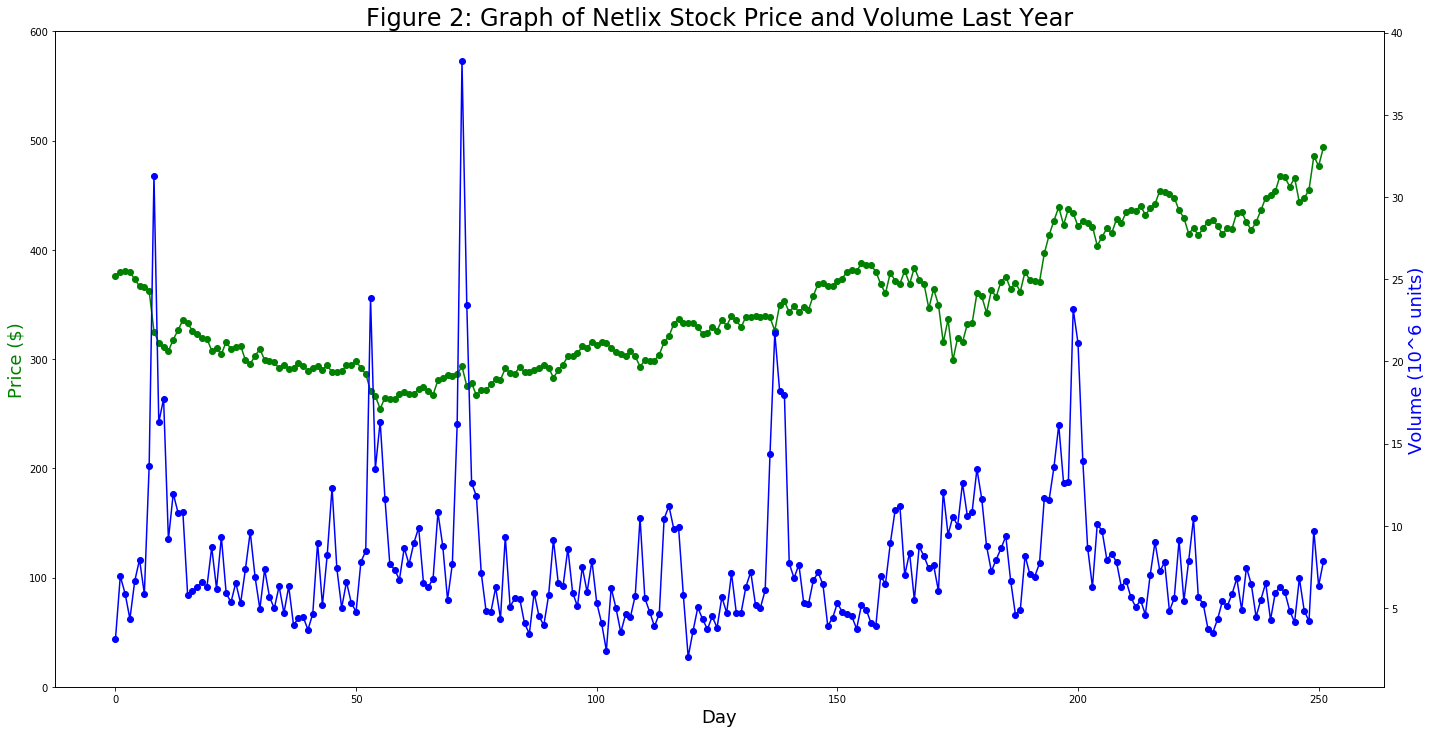

In [137]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd

data1 = pd.read_csv('Netflix Data.csv')
data1['Scaled Volume'] = data1['Volume']*0.000001

    
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlabel("Day",fontsize=18)
ax.plot(data1['Close'], color="green", marker="o")
ax.set_ylabel("Price ($)",color="green",fontsize=18)
plt.ylim(0, 600)
ax2=ax.twinx()
ax2.plot(data1['Scaled Volume'], color="blue", marker="o")
ax2.set_ylabel("Volume (10^6 units)",color="blue",fontsize=18)
fig.tight_layout()
plt.title('Figure 2: Graph of Netlix Stock Price and Volume Last Year', fontsize = 24)
plt.show()


In Figure 3, the General Motors stock shows year to year decline. The largest volumes traded occured at the start of the COVID-19 pandemic (day 150+), as traders probably associated the "stay at home" measures with lower future profitability for the General Motors company as a whole. 

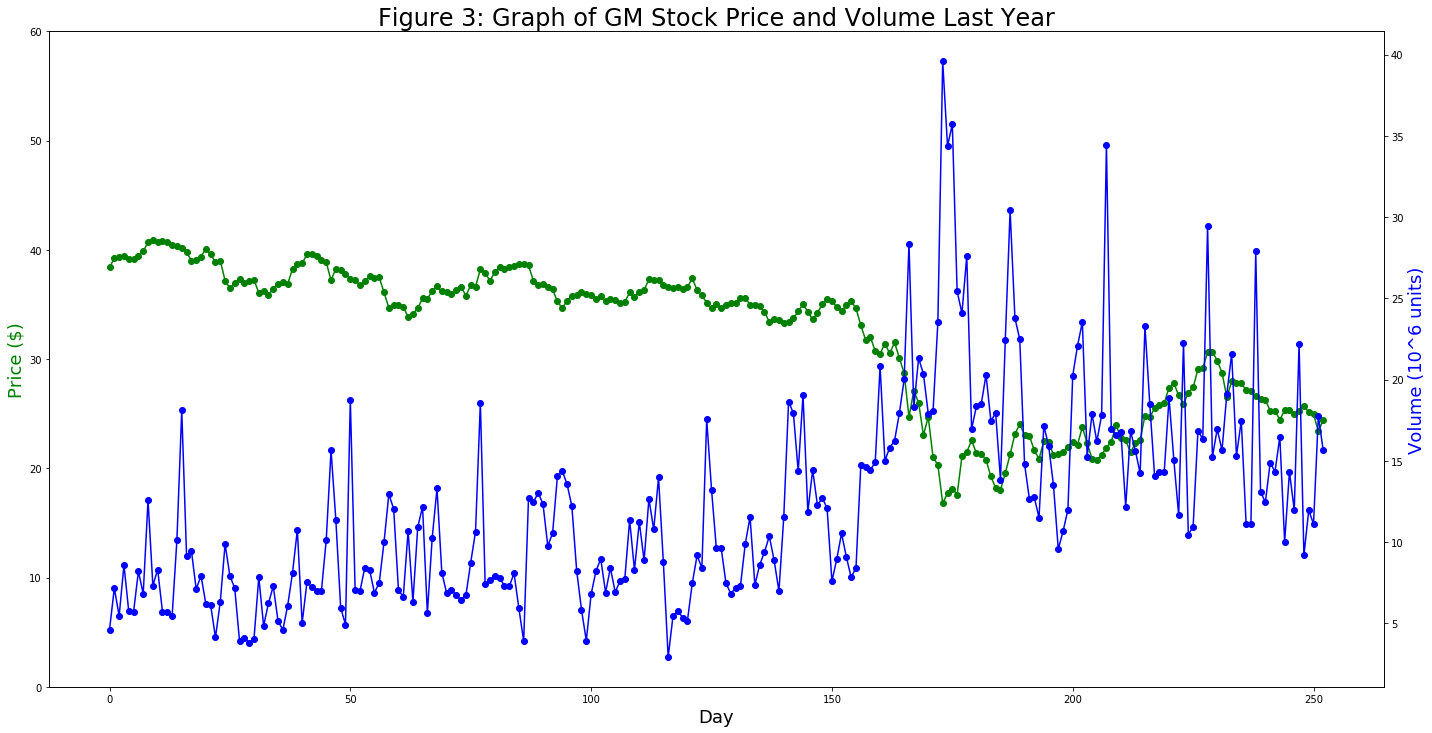

In [138]:
data2 = pd.read_csv('GM Data.csv')
data2['Scaled Volume'] = data2['Volume']*0.000001

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlabel("Day",fontsize=18)
ax.plot(data2['Close'], color="green", marker="o")
ax.set_ylabel("Price ($)",color="green",fontsize=18)
plt.ylim(0, 60)

ax2=ax.twinx()
ax2.plot(data2['Scaled Volume'], color="blue", marker="o")
ax2.set_ylabel("Volume (10^6 units)",color="blue",fontsize=18)
fig.tight_layout()
plt.title('Figure 3: Graph of GM Stock Price and Volume Last Year', fontsize=24)
plt.show()

In Figure 4, the TerraForm Power stock shows banded variability. This type of behaviour is meant to proxy for that of the foreign exchange market, which is lacking freely available volume information. 

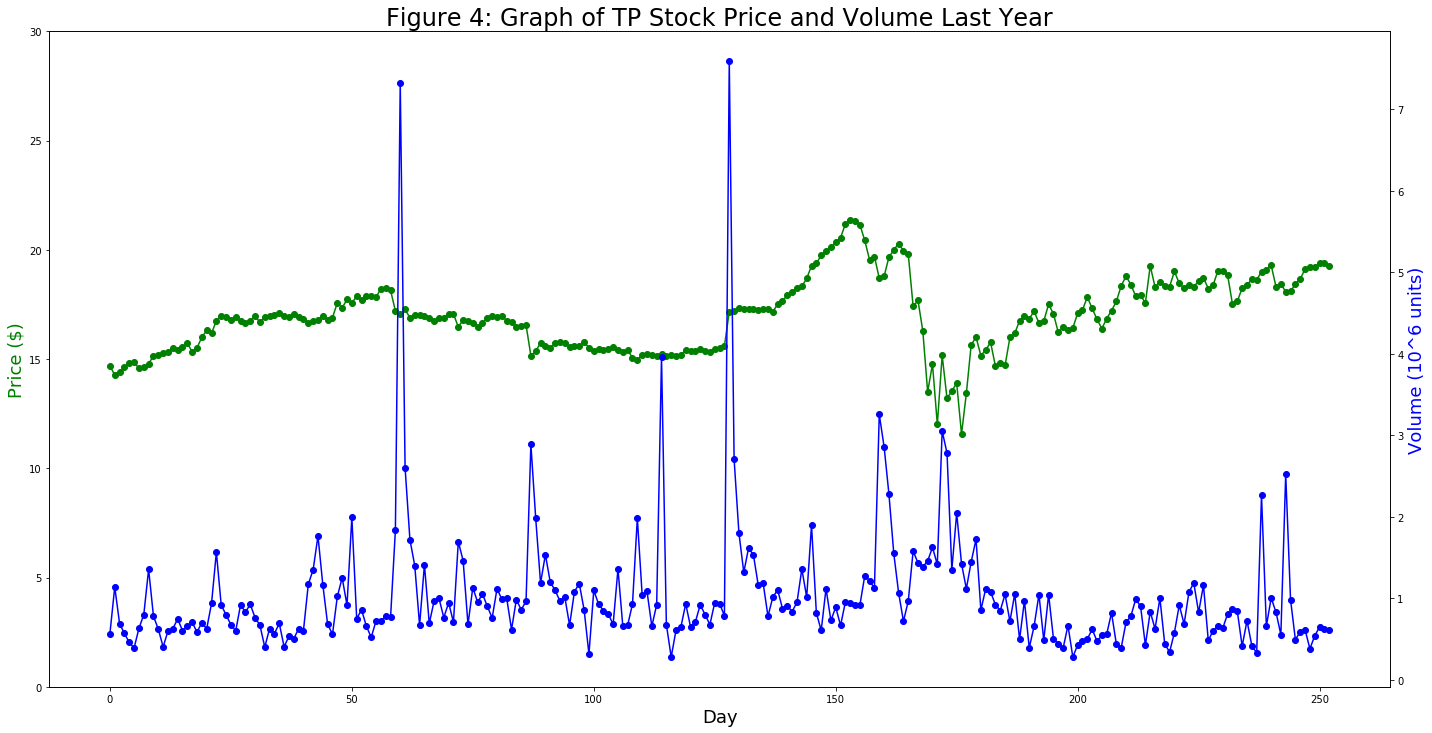

In [139]:
data3 = pd.read_csv('TP Data.csv')
data3['Scaled Volume'] = data3['Volume']*0.000001

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlabel("Day",fontsize=18)
ax.plot(data3['Close'], color="green", marker="o")
ax.set_ylabel("Price ($)",color="green",fontsize=18)
plt.ylim(0, 30)

ax2 = ax.twinx()
ax2.plot(data3['Scaled Volume'], color="blue", marker="o")
ax2.set_ylabel("Volume (10^6 units)",color="blue",fontsize=18)
fig.tight_layout()
plt.title('Figure 4: Graph of TP Stock Price and Volume Last Year', fontsize = 24)


plt.show()

# 3.5 Python code <a class="Python Code" id="Python Code"></a>

With an overview of the data in mind, I now go over the code which firstly calculates the index values, then puts an algorithm in place which buys or shorts the above stocks based on the index. A full version of the code without annotations is available in the same location as this notebook if a reader might want to run it.

## 3.5 a) - Historical Index Values <a class="Histindex" id="Histindex"></a>

In the first section, the program computes historical index values for the data set. This is later used to generate portfolios in order to test the hypotheses and conduct sensitivity analysis. 

The program begins by importing needed packages. User interaction is called to select parameters for "lookback", the averaging factor, the critical index value acting as a buy rule, and the current price (for current day calculations). This is done for the purpose of later conducting sensitivity analysis. By inputting the values when first running the code, a user is more easily able to observe return on investment across different parameters. 

In [1]:
#imports
import pandas as pd
import numpy as np
import itertools
import statistics as stat

######################## DATA and USER INPUTS ####################
##################################################################

df = pd.read_csv('Netflix Data.csv')


######################### amount of periods to lookback and compare current period to
userlookback = input('Enter nr. of lookback periods for index generation (recommended 1-3):   ')
lookback = int(userlookback)

######## length of moving averages, for sensitivty analysis ################################
useravrgfactor = input('Enter averaging factor, length of moving averages (recommended 5 to 8) :    ')
avrgfactor = int(useravrgfactor)

####################### insert the value of the index at which to buy/short
userrule = input('Enter the index critical value at which to make a move (recommended 1.0-1.5):   ')
rule = float(userrule)

######################## insert amount of shares to be bought at critical index values
sharenr = 100


######################### insert current price here to check whether to buy/short/no action (assumed volume support of 1)
userprice = input('Enter the current stock price today:   ')
cp = int(userprice)


Enter nr. of lookback periods for index generation (recommended 1-3):   1
Enter averaging factor, length of moving averages (recommended 5 to 8) :    5
Enter the index critical value at which to make a move (recommended 1.0-1.5):   1
Enter the current stock price today:   500


Next, the data is sorted and formulas (1.0), (1.1), (1.2), (1.3), and (2.1) are calculated. For variables that are affected by the averaging factor, I use a list formulation rather than Pandas DataFrame because it allows for easier parametrization. I still put the lists back into DataFrame columns so the formulas' information can be later displayed.

Firstly, as mentioned in section 3.4, I estimate the volume weighted average price, VWAP, as the average between the highest price, lowest price, and last price of the day. This is done through pandas by creating a new column "df['Dayprice']" which is the average of the values of 3 other columns, i.e. summing (df['High'] + df['Close'] + df['Low']) and dividing by 3.

I then transform this new dataframe column into a price list, p_list, for easier operations. This is done through the command .tolist() applied to the column df['Dayprice'].

In [ ]:
##########################################################################################################################
########## DATA SORTING ##################################################################################################

#vwap estimate for the day
df['Dayprice'] = (df['High'] + df['Close'] + df['Low'])/3

p_list = df['Dayprice'].tolist()

Next, I create a list which will record the day to day changes in price, pricedelta[].

From this, formula (1.0) calculates the change in price. For each day in the data set, identified by the range range(1, len(p_list), using the list generated from the dataframe column, p_list, I calculate the price change from the last day to the current day, "p_list[i]-p_list[i-1]".

In order to align the lengths of the lists for later calculations, I insert one zero at the begining of the pricedelta list. This is because on the first day of the dataset, there is no previous day to calculate a change in price from.

Lastly, I transform this list back into a column for later display, using the pd.Series command. 

In [ ]:
##########################################################################################################################
pricedelta = []

########################################### Formula (1.0)
    for i in range(1, len(p_list)):
    pricedelta.append(p_list[i]-p_list[i-1])

pricedelta.insert(0,0)

df['pricedelta'] = pd.Series(pricedelta)

Formula (1.2) calculates a moving average volume. This makes use of the user inputted value "avrgfactor". I first transform the dataframe column into a list, "volumelist". Next, one can only calculate a moving average of "n" days starting on the "nth" day, as such, I specificy a range beginning with the avrgfactor and ending with the length of the volume list, i.e. until the end of the data set. For each period, I calculate the average volume of the past days, i.e. summing the last "n" values (sum(volumelist[i-avrgfactor:i]) and dividing by "n", or the avrgfactor. Each of these values for the moving average volume is recorded in a list called "avrgvolume" for further calculations, done with the command avrgvolume.append. 

I also insert zeros at the start of the list in order to align the lengths of this and future lists, making other calculations easier (command avrgvolume.insert(0,0)). 

Lastly, I transform the average volume list back into a pandas dataframe column for future display and other calculations.

In [ ]:
avrgdelta = []
avrgvolume = []

######################################## Formula (1.2) average volume
volumelist = df['Volume'].tolist()
for i in range(avrgfactor, len(volumelist)+1):
    avrgvolume.append(sum(volumelist[i-avrgfactor:i])/avrgfactor)

for i in range(avrgfactor-1):
    avrgvolume.insert(0,0)
    
df['average volume'] = pd.Series(avrgvolume)



Formula (1.1) calculates the moving average change in price in exactly the same manner as above.

In [ ]:
######################################## Formula (1.1), average price delta
for i in range(avrgfactor+1, len(pricedelta)+1):
    avrgdelta.append(sum(pricedelta[i-avrgfactor:i])/avrgfactor)

for i in range(avrgfactor):
    avrgdelta.insert(0,0)

df['average delta'] = pd.Series(avrgdelta)

Formula (1.3) is the volume support: volume in the current period divided by the moving average volume. I perform this calculation within the data frame as a simple division of the values of each column. I create a new data frame column "VS" - volume support, which is the division of "Volume" and "average volume".

Formula (2.1) calculates the volume adjusted change in price, i.e. discounting the importance of a change in price based on how the volume supports it. Done within the dataframe, I create a new column "VAD" - volume adjusted delta, which is simply the product of the volume support "VS" and average change in price.

In [2]:

######################################### Formula (1.3), volume support
df['VS']=df['Volume']/df['average volume']



######################################### Formula (2.1), volume adjusted average price delta
df['VAD'] = df['VS']*df['average delta']



Moving on, I call on  the lists needed to keep track of vector information and period counters. All the information of the variables is kept to check the formulas work as intended and observe the behaviour of the algorithm over time. 

Pos_countlist keeps track of each day, marking it with a zero if on that day the average change in price is negative, and starting to count 1, 2, etc. for each positive day, restarting at zero everytime a separate positive period ends. Neg_countlist does the converse. 

NP/PP_counter (negative / positive period counter) records the average price period vector of each timepsan, thus keeping track of how many past positive timespans occured (by the length of the list) as well as the vector of their information. This is then used to calculate the index by comparing the current price period vector with the average price period vector of past timespans, the number of past timespans being determined by the user with the "lookback" parameter.

In [ ]:
############### COUNTERS ###################
############################################

####################################### overall positive and negative periods counters and their lists
PP_counter = 0
PP_countlist = []

NP_counter = 0
NP_countlist = []


###################################### within-period counters and their lists
pos_counter = 0
pos_countlist = []

neg_counter = 0
neg_countlist = []


In the next section, the index is calculated, more specifically the remaining formulas ((2.0),(2.2), and (3.0), (3.1)). The first part of the code calculates the index for negative timespans, while the second part does the same for positive ones.

The first part of the cell below transforms the dataframe columns into lists, making it easier to perform certain operations. This is done using the command .tolist() on the column itself, e.g. df['VAD'].tolist(). Following this, I call on multiple lists which will keep track of needed variables. I will explain what they do as they come up.

With all the lists ready, I begin the for loop which will calculate the vectors and index. Firstly, I specifiy a range starting from 0 to the length of the list "d", i.e. vectors will be calculated for all days for which moving averages are available.

The first condition identifies if the "ith" term of the list is negative (if d[i] < 0). If that is the case, several things occur. Firstly, the value of the moving average change in price is recorded as a term "dc" for calcuations. Next, since this is a negative period, the positive period counter is set to zero (pos_counter=0) and recorded on its list with the command .append. Conversely, the negative period counter is set to 1, since this is the first negative period of the current timespan. Its value is then recorded on the negative count list also with the command append, "neg_countlist.append(neg_counter)". 

In [3]:
######################## index and price-period vector calculation ########################
###########################################################################################

###################################### general lists and variables
d = df['VAD'].tolist()
v = df['VS'].tolist()
vap = 0
vap_list= []
ppv = 0
ppv_list = []
appv = 0
appv_list=[]
index = 0
index_list = []

for i in range(0, len(d)):
    if d[i] < 0:                                          #### negative period calculations
        dc = d[i]
        pos_counter = 0
        pos_countlist.append(0)
        neg_counter = neg_counter + 1
        neg_countlist.append(neg_counter)

Next, formula (2.0) is calculated, which is a volume adjusted period counter. This counts the number of negative periods that followed eachother, discounting their importance by the volume support. Essentially, the calculation simplifies to being a running sum of the volume support in a current timespan.

The two conditions deal with the cases of being in the first negative period or other negative periods (2nd, 3rd, etc.) of the current timespan. If this is the first negative period, i.e. if neg_counter == 1, the volume adjusted period "vap" is simply the value of volume support in that period, v[i]. This is identified through the list "v" which is the dataframe column "VS" - Volume Support. This value then gets recorded in the "vap_list" with the command append.

The second condition, "elif neg_counter > 1", deals with being in later periods of a negative timespan. This calculates the volume adjusted period "vap" as the current volume support value "v[i]" plus the value of the previous vap_list term, "vap_list[i-1]", which is the running sum of previous terms. This value is also then recorded on the vap_list with the append command. 

In [ ]:
        if neg_counter == 1:                               #### Formula (2.0) volume adjusted period calculation
            vap = v[i]
            vap_list.append(vap)
        elif neg_counter > 1:
            vap = v[i]+vap_list[i-1]
            vap_list.append(vap)

Next, formula (2.2) is calculated. This is a price period vector "ppv", or simply the product of the volume adjusted period "vap" from above and the current average change in price which is recorded as "dc". This value then gets recorded in its own list (ppv_list.append(ppv).

In [ ]:
         
        ppv = vap * dc                                    ##### Formula (2.2) price period vector calculation
        ppv_list.append(ppv)

Formula (3.0) is the average price period vector of all past periods and the present one, within the current timespan. As previously, two conditions deal with whether this is the first day of a negative timespan or a later day. If it is the first day, " if neg_counter == 1", the average PPV is simply the current PPV (since it is just one day), i.e. "appv = ppv_list[i]", and this is recorded with the append command in an appv_list. 

Also, since this is the first negative period of a negative timespan, it is a good mechanism to identify the end of a positive timespan (due to the fact that if this is the first negative day, that means the last day was the last positive day of the previous timespan). This is done with the condition "if pos_countlist[i-1] > 3:", meaning that if the previous positive timespan consisted of 3 or more periods, it should be recorded. The choice of a minimum of 3 periods is done to ignore highly erratic variability on a day to day basis. As such, only periods of relatively consistent decline or growth are recorded and compared. Thus, if the past positive timespan consisted of 3 or more positive days, its occurence is recorded within the positive period counter "PP_counter = PP_counter +1", and the value of its average price period vector - appv, is recorded in a list, "PP_countlist" using the command append.

Returning back to the case of this not being the first negative period, "elif neg_counter>1", the average price period vector is calculated by summing the past values of the timespan until the present, "sum(ppv_list[i - neg_counter + 1:i+1]", and dividing by the number of periods, recorded in "neg_counter". This value then gets recorded in the appv list.

In [ ]:
        if neg_counter == 1:                             ###### Formula (3.0) average price period vector calculation
            appv = ppv_list[i]
            appv_list.append(appv)
       
    
            if pos_countlist[i-1] > 3:                     #### mechanism to identify the end of a positive period
                PP_counter = PP_counter+1
                PP_countlist.append(appv_list[i-1])
                
                
        elif neg_counter > 1:
            appv = sum(ppv_list[i - neg_counter + 1:i+1]) / (neg_counter)
            appv_list.append(appv)

Finally, formula (3.1) calculates the index. As previously mentioned, this calculation depends on the user inputted parameter "lookback", i.e. the number of past timespans to compare the average price period vectors. 

It begins with the condition of NP_counter >=1, identifying whether at least one past negative timespan does indeed exist (reminder that NP_counter counts the number of negative timespans). And a further condition, "lookback <= 1 or NP_counter<=lookback" that checks if the value of the lookback is either 1 or smaller than the number of negative timespans (because e.g. if you are comparing to the last 3 periods, you need at least 3 last periods to in fact exist). 
If these conditions are met for the case of the lookback parameter being 1, the index is calculated by the division of the current average price period vector with the last average price period vector of a negative timespan: "appv / NP_countlist[NP_counter-1]". The average price period vectors are recorded in the NP_countlist, and I reference exactly the last one by the term [NP_counter-1] meaning if we are in e.g. the 5th negative timespan, NP_counter = 5, so I am referencing the appv of the 4th negative timespan, NP_counter - 1 = 5-1 = 4. This value is then recorded in the index list with the append command.

Next, for the case of the lookback parameter being larger than 1 ( elif lookback > 1) and there also being a sufficient number of past timespans to perform the calculation (NP_counter > lookback), the index is calculated by comparing the current average price period vector with the average of the past selected periods APPVs. More specifically, I reference the values of the past APPVs going from the current period as far back as the length of the lookback, NP_countlist[NP_counter-lookback:NP_counter]. These are then summed and divided by the lookback itself. Ultimately, the current APPV is divided by this value to obtain a comparison of the current negative change in the stock versus the past negative changes in the stock. The index value is then recorded.

In [ ]:
       
        if NP_counter >= 1 and (lookback <= 1 or NP_counter<=lookback):         ######### Formula (3.1) index calculation
            index = appv / NP_countlist[NP_counter-1]
            index_list.append(index)
        elif lookback > 1  and NP_counter > lookback:
            index = appv / (sum(NP_countlist[NP_counter-lookback:NP_counter])/lookback)
            index_list.append(index)


The next part of the code performs the same operations as above, calcuating the index through formulas (2.0), (2.2), (3.0), and (3.1) but for positive timespans.

Fringe cases are simply recorded as a zero in the lists, in order to prevent any ordering errors. Also, for the days in which an index was not calculated, a zero is inserted at the start of the index list. Lastly, the index list is transformed into a dataframe column for display.

In [4]:
            
    elif d[i] > 0:                                        ################ positive periods calculations
        dc = d[i]
        neg_counter = 0
        neg_countlist.append(0)
        pos_counter = pos_counter + 1
        pos_countlist.append(pos_counter)
        
        if pos_counter == 1:                                  #### Formula (2.0) volume adjusted period calculation
            vap = v[i]
            vap_list.append(vap)
        elif pos_counter > 1:
            vap = v[i]+vap_list[i-1]
            vap_list.append(vap)
            
        ppv = vap * dc                                     ##### Formula (2.2) price period vector calculation
        ppv_list.append(ppv)
        
        if pos_counter == 1:                               ###### Formula (3.0) average price period vector calculation
            appv = ppv_list[i]
            appv_list.append(appv)
            if neg_countlist[i-1] > 3:
                NP_counter = NP_counter+1
                NP_countlist.append(appv_list[i-1])
        elif pos_counter > 1:
            appv = sum(ppv_list[i - pos_counter+1:i+1]) / (pos_counter)
            appv_list.append(appv)
        
        if PP_counter > 1 and (lookback <= 1 or PP_counter<=lookback):          ######## Formula (3.1) index calculation
            index = appv / PP_countlist[PP_counter-1]
            index_list.append(index)
        elif lookback > 1 and PP_counter > lookback:
            index = appv / (sum(PP_countlist[PP_counter-lookback:PP_counter])/lookback)
            index_list.append(index)

    else:                                                   ################# fringe cases
        pos_countlist.append(0)
        neg_countlist.append(0)
        vap_list.append(0)
        ppv_list.append(0)
        appv_list.append(0)

for i in range(len(d)-len(index_list)):
    index_list.insert(0,0)

df['index'] = index_list

## 3.5 b) - Current Day Index <a class="Cindex" id="Cindex"></a>

The next step is to display the information obtained and use it to calculate a present day index based on the price inserted by the user. This is a feature meant to aid the decision of a potential trader to enter the market. If he/she sees yesterday's index being e.g. 0.9, but based on today's price the index moved up to 1.1, it indicates a price movement period larger than usual, as such, a potentially good moment to enter the market.

Firstly I print last period's index by referencing it from the index_list. The last day is the length of the data set minus one, index_list[len(d)-1]. I also reprint the user inputted current price, cp. This information is to offer a frame of reference for decisionmaking. 

In [ ]:
####### DISPLAY ###########################


print('                ')
print('                ')
print('                ')
print('Last period index:')
print(round((index_list[len(d)-1]),3))
print('                ')
print('                ')
print('                ')
print('Selected price for current period')
print(cp)
print('                ')
print('                ')
print('                ')


Next, since volume data is not available instantly, it cannot be inputed in the formula, as such I use a volume support of 1 (essentially not discounting or emphasizing the importance of the current price change), cvs = 1.

The current volume adjusted period, cvap, is calculated by referencing last period's VAP from the vap_list (vap_list[len(d)-1]) and adding the value of the current period to it, reflected by the variable cvs. This takes care of formula (2.0). 


In [ ]:
################## CURRENT DAY CALCULATION ############################
#######################################################################

cvs = 1                                   ### assumed volume support of 1 for current period

cvap = vap_list[len(d)-1]+cvs


Further, to calculate the volume adjusted change in price, I transform the dataframe column of price into a list, p_list, and also the data frame column of change in price to its own list, d_list. From this I calculate the current change in price, cd, as the difference between the current price, cp, and the price yesterday, p_list[len(d)-1]. This is then used to calculate the current average change in price. Since it is based on the averaging factor, I reference the last periods as far back as the term "avrgfactor" up to the last day, d_list[len(d)-avrgfactor + 1:len(d)-1], then add the current change in price, cd, and finally divide by the number of periods, avrgfactor. This takes care of formula (2.1).

In [ ]:
p_list = df['Dayprice'].tolist()
d_list = df['D'].tolist()

cd = cp - p_list[len(d)-1]
cad = (sum(d_list[len(d)-avrgfactor + 1:len(d)-1]) + cd)/avrgfactor    ### formula (2.1)


The current price period vector, cppv, is calculated as the product of the volume adjusted change in price, cad, and volume adjusted period, cvap, thus taking care of formula (2.2).

Formula (3.0), the average price period vector, is calculated by averaging the past price period vectors going as far back as the length of the current timespan. The top of the fraction, i.e. the sum of PPVs is referenced from the ppv_list as [len(d)-(neg_counter+pos_counter) + 1:len(d)-1]. This formulation makes sure to provide the right calculation regardless of whether the timespan is positve or negative. For example, when neg_counter is 5, meaning that currently there has passed 5 negative periods with the current timespan, pos_counter is 0, thus the referencing takes only the last 5 negative values and sums them together. Since this calculation is for the current day, I also add the current PPV, cppv, and finally divide by the length of the timespan + the current day, / (neg_counter + pos_counter+1).

In [ ]:
cppv = cad*cvap                       ### formula (2.2)
cappv = (sum(ppv_list[len(d)-(neg_counter+pos_counter) + 1:len(d)-1]) + cppv) / (neg_counter + pos_counter+1) #formula (3.0)


Lastly, the index is calculated based on whether the current period is negative or positive. Identifying this by the price period vector, if it is postive (if cppv > 0), the index is the current average price period vector, cappv, divided by last periods average price period vector, which is referenced from the list PP_countlist as the last term "PP_counter - 1". The converse is done if the vector is negative (elif cppv < 0).

From this information, the index is printed, along with a suggestion of whether to buy, short, or take no action based on whether the index exceeds the critical index value inputted by the user.

In [73]:

if cppv > 0:
    cindex = cappv / PP_countlist[PP_counter-1]
elif cppv < 0:
    cindex = cappv / NP_countlist[NP_counter-1]

#######################################################################
#######################################################################
print('Current index')
print(round(cindex,3))
print('                ')
if cindex > rule and cppv > 0:
    print('Action:')
    print('Short stock')
elif cindex > rule and cppv < 0:
    print('Action:')
    print('Buy stock')
elif cindex < rule:
    print('Action:')
    print('Take no action, wait for further change')
#####################################################################
#####################################################################


                
                
                
Last period index:
0.694
                
                
                
Selected price for current period
500
                
                
                
Current index
0.985
                
Action:
Take no action, wait for further change


## 3.5 c) - Algorithm for Hypotheses Testing and Sensitivity Analysis <a class="algo" id="algo"></a>

The last part of the code calculates a hypothetical portfolio which is used to test the hypotheses and conduct sensivity analysis across a range of parameters. The algorithm buys or sells/shorts a fixed amount of shares when the index value in a period exceeds the critical value selected by the user. The return on investment from this buying and selling is plotted on a graph. Next to it, another graph shows the amount of shares the portfolio has from trade to trade: it is a negative value if the algorithm shorted (therefore having to buy back at a later date) and a positive value if the algorithm bought (therefore owning a certain amount of the stock). 

The cell below calls on severable variables and lists needed to track all relevant information. Pnlcp_list keeps track of the stock price in each period the algorithm bought or shorted. Rt_list tracks the running total value of the portfolio, i.e. the shares held times their value. Sc_list tracks the number of shares the portfolio is holding, and lastly, ROI_list tracks the average return on investment of the portfolio over time.

The variable traded takes on the value of zero or one to indicated if a trade already occured in a certain timespan. 

In [ ]:
############ Algorithm Profit & Loss Calculation ###########
############################################################

pnlcp = 0                       
pnlcp_list = []                           ##  prices at buy/short moments

runningtotal = 0
rt_list = []                             ##  running total value of the portfolio

sharecount = 0
sc_list = []                             ## number of shares the portfolio has over time 

average_ROI = 0
ROI_list = []                            ## average return on investment across time

traded = 0

The next part of the code is the algorithm buying across the historical values of the data set. For the available periods where an index was calculated, i.e. in range(0, len(index_list)), I identify the beginning of each timespan using the counters recorded in pos_countlist and neg_countlist. To reiterate, when the value of a term in pos_countlist is zero, the negative countlist always has values of 1 or above. As such, "if pos_countlist[i] + neg_countlist[i] == 1" identifies the beginning of a positive or negative timespan. In this case, the traded variable is set to zero to indicate that a trade is allowed to occurr.

In [ ]:
for i in range(0, len(index_list)):
    
    if pos_countlist[i] + neg_countlist[i] == 1:
        traded = 0

The part below deals with negative calculations. Once a trade is allowed to occurr (if traded == 0), I identify if within that timespan, the value of the index exceeds the critical value (index_list[i] > rule). Then check if the current timespan is negative (avrgdelta[i]<0 and pricedelta[i]<0) by referencing the value of average change in price from the avrgdelta list and the change in price itself from the pricedelta list. If the timespan is negative, and the index value is exceeded, this indicates a period of larger than usual decline, i.e. the stock is cheaper than normal and should be bought.

When the conditions hold, the traded variable is set to 1 to indicate a trade occurred. The price at this buy moment, pnlcp is referenced from the price list, p_list and recorded in its own list, pnlcp_list, with the command append. 

Next, the change in value of the portfolio is calculated as runningtotal = runningtotal - pnlcp * sharenr, where the price at this moment (pnlcp) is multipled by the amount of shares bought (sharenr). This value is then recorded in its own list, rt_list.

Lastly, the sharecount is updated with the newly added shares and this gets recorded in sc_list. 

In [ ]:
    if traded == 0 and index_list[i] > rule and avrgdelta[i]<0 and pricedelta[i]<0:    ### algorithm buys if price is lower than usual and critical index value is exceeded
        traded = 1
        pnlcp = p_list[i]
        pnlcp_list.append(pnlcp)
        runningtotal = runningtotal - pnlcp * sharenr
        rt_list.append(runningtotal)
        sharecount = sharecount + sharenr
        sc_list.append(sharecount)

The same process as in the previous cell is repeated for positive timespans. 

In [ ]:
    elif traded == 0 and index_list[i] > rule and avrgdelta[i]>0 and pricedelta[i]>0:    ### algorithm shorts if price is higher than usual and critical index value is exceeded
        traded = 1
        pnlcp = p_list[i]
        pnlcp_list.append(pnlcp)
        runningtotal = runningtotal + pnlcp * sharenr
        rt_list.append(runningtotal)
        sharecount = sharecount - sharenr
        sc_list.append(sharecount)
            

The final results dispaly comes in the form of a graph showing return on investment over the trades that occurred. A subplot next to it shows the sharecount over the same timeperiod, thus allowing to see exactly when the algorithm bought or shorted.

Below the graph we may see the return on investment when positions were closed over the data set, i.e. times when the sharecount was equal to zero. This shows how profitable the algorithm is when selling all of its shares at the correct moments as indicated by the critical value.

Lastly, we may see the exit value if we were to exit in the last period of the data set. This information is useful in concluding exactly how much the algorithm would have made if applied to a set period of time, e.g. 1 year as in our case.

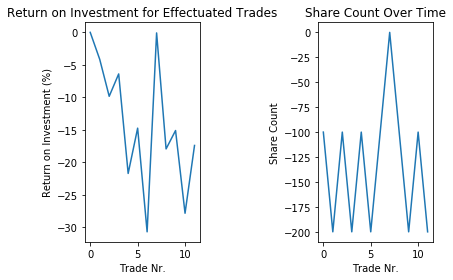

Return on Investment for Closed Positions Across the Trade Period (%)
-0.085
                
                
Price Last Period:
                
491.04
                
                
Return on Investment if Exiting Last Period (%)    
                
-28.249


In [83]:
################ Graph of Final Information
############################################

import matplotlib.pyplot as plt
import numpy

for i in range(0, len(sc_list)):
    if sc_list[i] < 0:
        average_ROI = ((rt_list[i] / (pnlcp_list[i]*sc_list[i]*-1)) - 1) * 100
        ROI_list.append(average_ROI)
    if sc_list[i] > 0:
        average_ROI = ((rt_list[i] / (pnlcp_list[i]*sc_list[i]*-1)) - 1) * 100
        ROI_list.append(average_ROI)
    elif sc_list[i] == 0:
        average_ROI = rt_list[i] / max(abs(max(rt_list)), abs(min(rt_list)))
        ROI_list.append(average_ROI)
        
ROI_plot = ROI_list[0:len(sc_list)]

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot(ROI_plot)
ax2.plot(sc_list)
ax1.set_xlabel('Trade Nr.')
ax1.set_ylabel('Return on Investment (%)')
ax1.set_title('Return on Investment for Effectuated Trades')
ax1.legend()
ax2.set_xlabel('Trade Nr.')
ax2.set_ylabel('Share Count')
ax2.set_title('Share Count Over Time')
ax2.legend()
fig.tight_layout()

plt.show()


print('Return on Investment for Closed Positions Across the Trade Period (%)')
for i in range(0, len(sc_list)):
    if sc_list[i] == 0:
        print(round(ROI_plot[i],3))

print('                ')
print('                ')


######### calculation of hypothetical exit values
#################################################
if sharecount != 0:
    print('Price Last Period:')
    print('                ')
    print(round(p_list[len(p_list)-1],2))
    print('                ')
    print('                ')
    print('Return on Investment if Exiting Last Period (%)    ')
    print('                ')
    if sharecount < 0:
        exit_value = runningtotal - p_list[len(p_list)-1]*sharecount*(-1)
        roi_exit = round(((exit_value / (max(abs(max(rt_list)),abs(min(rt_list))))) * 100),3)
        print(roi_exit)
    elif sharecount > 0:
        exit_value = p_list[len(p_list)-1]*sharecount - runningtotal*(-1)
        roi_exit = round(((exit_value / (max(abs(max(rt_list)),abs(min(rt_list))))) * 100),3)
        print(roi_exit)


# 4. Results and Sensitivity analysis <a class="results" id="results"></a>

The results first show a graph of historical index values for the stock, then a table of the return on investment upon exiting the market last period, for each of the stocks.

The graphs display the indexes calculated based on a single instance of parameters (that is, lookback paramater 1, averaging parameter 5). By looking at these figures, one may notice how the price changes correspond to changes in the index and understand where potential trades could occurr.

In the tables, I have run the program 18 times for each of the data sets (Netflix, GM, TP), conducting sensitivity analysis for 1, 2 period lookbacks, with averaging factor 6, 7, 8 and trade decision rule 1, 1.25, 1.5. The first 3 columns indicate the specific parameter combination that was inputted in the program. In particular, the index value shows what critical value must be exceeded in order for the algorithm to make a trade. Next, the Profit and Loss shows the monetary value obtained by trading over the dataset's time period. Maximum Exposure shows the highest amount of money that was invested throughout the trades. 

Lastly, Outstanding Position shows the amount of shares the portfolio still has at the end of the trade period. If it is negative, the portfolio still owns shorted shares (which must be bought back at a later date); conversely, if it is positive, the portfolio still owns bought shares. When the outstanding position is zero, this means that given those paramater values, the algorithm has effectuated the same amount of buys and shorts throughout the trade period, ending it with no shares owned. This is referred to as a closed position. These values occurr in multiples of 100, as shares are traded in increments of 100 (a value chosen at the start of the program). Lastly, the Return on Investment column shows the percentage profit earned if one where to exit the market last period, i.e. clearing the outstanding position of any shares. This is done to judge the profitability of various parameters over the same time period. However, exiting the market when there is still an oustanding position means selling at a value that is not indicated by the index, as such may often result in a loss.




#### Figure 5: Graph of Historical Index Values for Netflix Stock

In the first graph, one may see the historical index values and the price of the Netflix stock. The data for price (from p_list) and indexes (index_list) was written into a csv file for storage, then reinputted to be displayed.

Firstly, one may note that approximately the first 50 days do not have any values for the index. As a reminder, the index is constructed by comparing timespans of growth and decline to eachother, thus for the start of the dataset, the algorithm gathers period to compare to, and only begins calculating the index once the minimum necessary amount of periods have occurred.

From looking at the figure, it can be noticed that the index often increases in value at correct times, indicating a relative peak or through in the stock price. The purpose of the index is to signal periods of larger than usual decline or growth, thus suggesting whether to buy, short, or take no action.

Choosing the right critical value at which to enter the market is very important to maximize profitability (an example threshold is shown on the graph). Essentially, the first time the index spikes over this critical value, the algorithm buys or shorts. 

Due to this, e.g. a higher critical value also generally means that fewer trades are effectuated, because the threshold is surpassed less often. For example, in the graph below, choosing a critical value of 8 would result in only one trade (because this treshold is surpassed once), whereas choosing a critcal value of 4 would result in multiple trades, because this value is surpassed more times (around day 60, day 100, and day 150, etc.).

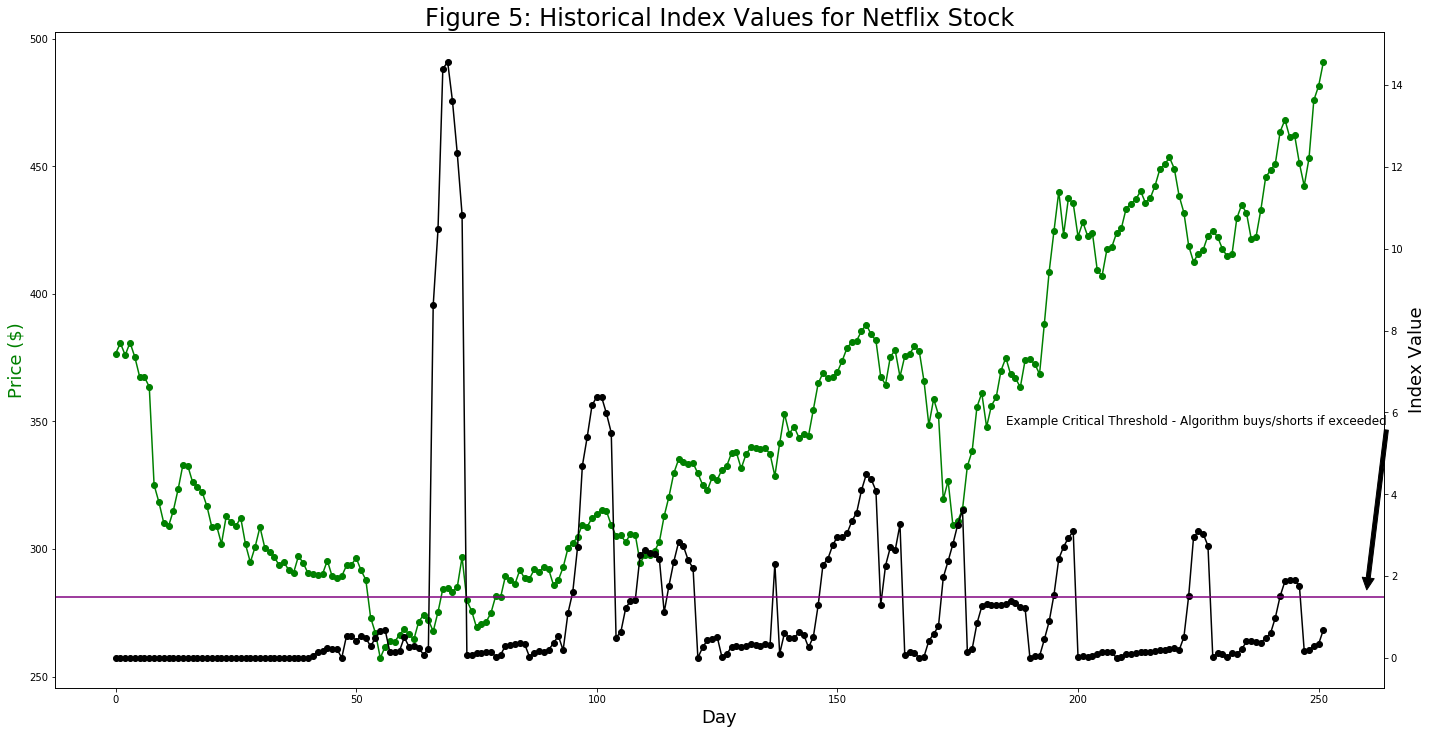

In [136]:
#csv_data = {'Price($)' : p_list, 'Index' : index_list}
#csv_frame = pd.DataFrame(csv_data)
#csv_frame.to_csv('C:/Users/Ciprian Tudor/Desktop/NFLX Indexes.csv')

hist_indexes = pd.read_csv('NFLX Indexes.csv')
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlabel("Day",fontsize=18)
ax.plot(hist_indexes['Price($)'], color="green", marker="o")
ax.set_ylabel("Price ($)",color="green",fontsize=18)

ax2 = ax.twinx()
ax2.plot(hist_indexes['Index'], color="black", marker="o")
ax2.set_ylabel("Index Value",color="black",fontsize=18)
fig.tight_layout()
plt.title('Figure 5: Historical Index Values for Netflix Stock', fontsize = 24)

plt.axhline(y=1.5, color='purple', linestyle='-')

ax.annotate('Example Critical Threshold - Algorithm buys/shorts if exceeded', fontsize=12,
            xy=(260, 284),
            xytext=(185, 350),
            arrowprops=
                dict(facecolor='black', shrink=5),
                horizontalalignment='left',
                verticalalignment='center')
plt.show()

In the table below, one may see sensitivty results for the Netflix Stock trade profitability. 

Looking at the results, average return on investment upon exit is 2.6%, but this occurrs over a range from -37% to +67%, which implies an extremely large variance. 

The average profitability for closed positions is 40.3%. It should be noted this happens with the same lookback parameter (1) and averaging parameter (8), thus perhaps not providing a fully representative picture. 

### Table 1 - Netflix Profit & Loss Results

In [145]:
nflxresults = pd.read_excel('Netflix Results.xlsx')
nflxresults['Threshold to Buy/Short'] = nflxresults['Index Value']
pd.set_option('precision', 2)
nflxresults[['Lookback Parameter', 'Averaging Parameter','Threshold to Buy/Short', 'Profit and Loss ($)', 'Maximum Exposure ($)', 'Outstanding Position (Nr. Of Shares)', 'Return on Investment (% on Exit)']]

,Lookback Parameter,Averaging Parameter,Threshold to Buy/Short,Profit and Loss ($),Maximum Exposure ($),Outstanding Position (Nr. Of Shares),Return on Investment (% on Exit)
0,1,6,1.00,-7369,65073,-100,-11.32
1,1,6,1.25,-4767,66082,-100,-7.21
2,1,6,1.50,-4510,65875,-100,-6.85
3,1,7,1.00,36487,59442,100,61.38
4,1,7,1.25,38967,58169,100,66.99
5,1,7,1.50,-488,69870,-100,-0.70
6,1,8,1.00,12666,35927,0,35.25
7,1,8,1.25,15534,37911,0,40.97
8,1,8,1.50,16994,38119,0,44.58
9,2,6,1.00,-24497,73709,-200,-33.23


#### Figure 6: Historical Index Values for GM Stock

In the General Motors graph, the behaviour of the index appears to be much more erratic, but again, seems to often correspond to a peak or through.

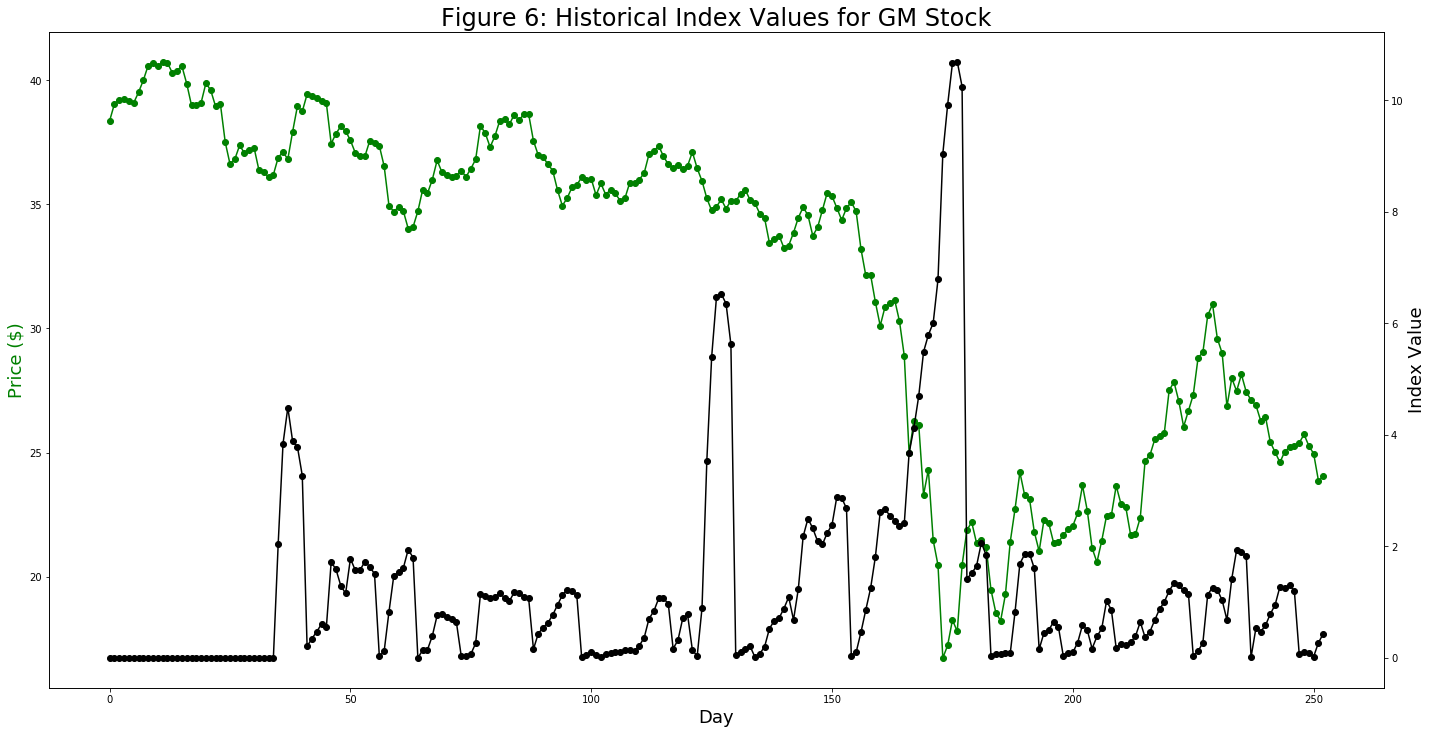

In [129]:
histgm_indexes = pd.read_csv('GM Indexes.csv')
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlabel("Day",fontsize=18)
ax.plot(histgm_indexes['Price($)'], color="green", marker="o")
ax.set_ylabel("Price ($)",color="green",fontsize=18)

ax2 = ax.twinx()
ax2.plot(histgm_indexes['Index'], color="black", marker="o")
ax2.set_ylabel("Index Value",color="black",fontsize=18)
fig.tight_layout()
plt.title('Figure 6: Historical Index Values for GM Stock', fontsize = 24)
plt.show()

In the following table one may see sensitivty results for the General Motors Stock trade profitability.

The average return on investment upon exit is -22.2%, ranging from -34.8% to 7.4%. In this case, the variance is lower than the previous stock, and provides consistently negative results. 

The average return on investment for closed positions is -25.5%, this time occuring over multiple parameter values. 

### Table 2 - General Motors Profit & Loss Results

In [146]:
gmresults = pd.read_excel('GM Results.xlsx')
gmresults['Threshold to Buy/Short'] = gmresults['Index Value']
gmresults[['Lookback Parameter', 'Averaging Parameter','Threshold to Buy/Short', 'Profit and Loss ($)', 'Maximum Exposure ($)', 'Outstanding Position (Nr. Of Shares)', 'Return on Investment (% on Exit)']]

,Lookback Parameter,Averaging Parameter,Threshold to Buy/Short,Profit and Loss ($),Maximum Exposure ($),Outstanding Position (Nr. Of Shares),Return on Investment (% on Exit)
0,1,6,1.00,335,7502,-100,4.47
1,1,6,1.25,569,7715,-100,7.38
2,1,6,1.50,-2208,6501,100,-33.96
3,1,7,1.00,-2186,6285,0,-34.78
4,1,7,1.25,-2116,6215,0,-34.05
5,1,7,1.50,-801,3863,0,-20.74
6,1,8,1.00,-2796,9802,200,-28.52
7,1,8,1.25,-3224,10101,200,-31.92
8,1,8,1.50,-2191,6699,100,-32.71
9,2,6,1.00,-521,4728,0,-11.02


#### Figure 7: Historical Index Values for TP Stock

In the last graph, one may see the index values for the TerraForm Power stock. I was forced to limit the y range, as the index spiked too far due to a relatively much larger volume traded, and the scale was distorted making it hard to see the information. 

Here, we may see that the index is initially rather poorly correlated with price fluctuations, but past day 150 it aligns quite well. 

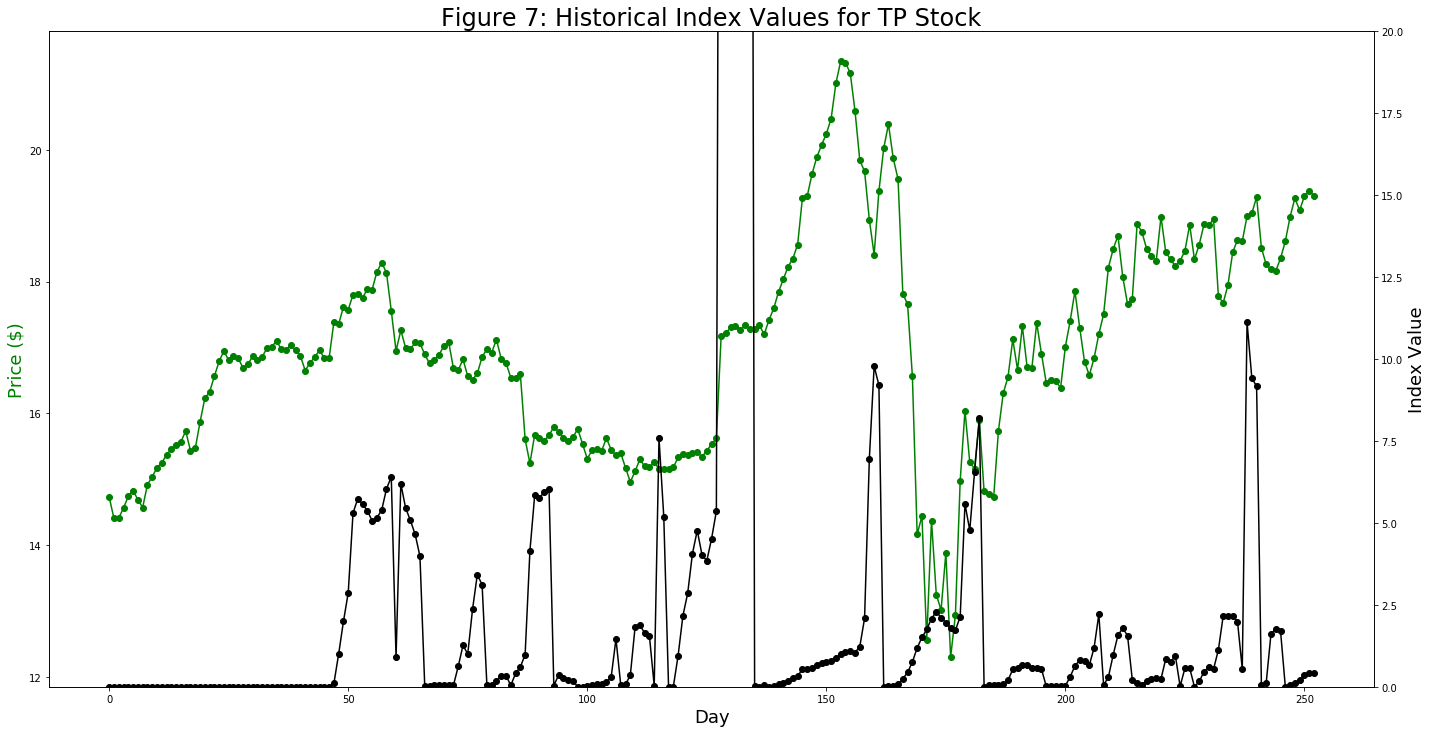

In [130]:
histtp_indexes = pd.read_csv('TP Indexes.csv')
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlabel("Day",fontsize=18)
ax.plot(histtp_indexes['Price($)'], color="green", marker="o")
ax.set_ylabel("Price ($)",color="green",fontsize=18)

ax2 = ax.twinx()
ax2.plot(histtp_indexes['Index'], color="black", marker="o")
ax2.set_ylabel("Index Value",color="black",fontsize=18)
plt.ylim(0,20)
fig.tight_layout()
plt.title('Figure 7: Historical Index Values for TP Stock', fontsize = 24)
plt.show()

In the next table one may see sensitivity results for the TerraForm Power Stock trade profitability. As a reminder, this dataset was meant to proxy for the behaviour of the foreign exchange market, which would be the ideal situation the algorithm works in.

Here, the average return on investment is 25.4%, ranging from 10.1% to 50.5% (with all values besides the 50.5 one being below 40). In this case, the variance of return on investment is lowest out of the 3 stocks, and the results are consistently positive.

The average return on investment for closed positions is 16.3%, occuring for the instance of lookback parameter being 2, and averaging parameter being 8, across the 3 index critical values. Once again, perhaps not a fully representative picture. 

Nevertheless, return on investment upon exiting remains consistently positive across all parameters. The reason for this is because the algorithm managed to succesfully close profitable positions in multiple past trades.

### Table 3 - TerraForm Power Profit & Loss Results

In [147]:
tpresults = pd.read_excel('TP Results.xlsx')
tpresults['Threshold to Buy/Short'] = tpresults['Index Value']
tpresults[['Lookback Parameter', 'Averaging Parameter','Threshold to Buy/Short', 'Profit and Loss ($)', 'Maximum Exposure ($)', 'Outstanding Position (Nr. Of Shares)', 'Return on Investment (% on Exit)']]

,Lookback Parameter,Averaging Parameter,Threshold to Buy/Short,Profit and Loss ($),Maximum Exposure ($),Outstanding Position (Nr. Of Shares),Return on Investment (% on Exit)
0,1,6,1.00,1401,4473,300,31.32
1,1,6,1.25,1441,6248,300,23.06
2,1,6,1.50,1499,6191,300,24.21
3,1,7,1.00,1284,4596,300,27.94
4,1,7,1.25,1279,6416,300,19.93
5,1,7,1.50,1414,6280,300,22.52
6,1,8,1.00,888,8763,500,10.13
7,1,8,1.25,890,8761,500,10.16
8,1,8,1.50,901,8749,500,10.30
9,2,6,1.00,849,2127,100,39.92


### Table 4 - Overall Closed Positions Profit & Loss Results

In the last table, I present a summary of the closed position results from all 3 of the stocks. While the results are interesting, the limited amount of data can hardly provide a sufficient sample set. As will be discussed in the next section, certain methods allow for testing many more stocks at the same time, but they require significant computing power and a large time investment. 

In [5]:
closedposresults = pd.read_excel('Closed Positions Results.xlsx')

closedposresults[['Stock Name', 'Lookback Parameter', 'Averaging Parameter','Index Value', 'Profit and Loss ($)', 'Maximum Exposure ($)', 'Outstanding Position (Nr. Of Shares)', 'Return on Investment (% on Exit)']]

,Stock Name,Lookback Parameter,Averaging Parameter,Index Value,Profit and Loss ($),Maximum Exposure ($),Outstanding Position (Nr. Of Shares),Return on Investment (% on Exit)
0,Netflix,1,8,1.00,12666,35927,0,35.254822
1,Netflix,1,8,1.25,15534,37911,0,40.974915
2,Netflix,1,8,1.50,16994,38119,0,44.581442
3,General Motors,1,7,1.00,-2186,6285,0,-34.781225
4,General Motors,1,7,1.25,-2116,6215,0,-34.046661
5,General Motors,1,7,1.50,-801,3863,0,-20.735180
6,General Motors,2,6,1.00,-521,4728,0,-11.019459
7,General Motors,2,7,1.00,-2607,9643,0,-27.035155
8,TerraForm Power,2,8,1.00,293,2186,0,13.403477
9,TerraForm Power,2,8,1.25,354,2248,0,15.747331


# 5. Conclusions and Discussion <a class="conclusion" id="conclusion"></a>

To answer the research question, I have shown a way in which volume might be used for predictive price analysis, to a quite varied degree of success. As we can see from the results, across most of the range of values, the approach yields a negative return. 

One of the reasons for this, as previously mentioned, is that there is an outstanding position: shares are still being held (positive if bought, negative if shorted). As such, if we calculate Return on Investment based on the exit value of the current price (a price that the algorithm indicates we should not make a move at), it often yields a negative result. Nevertheless, even ignoring the cases with an outstanding position, we may see that the average return on investment for closed positions strongly depends on the type of stock it is applied to. 

Perhaps as expected, the algorithm has a hard time predicting price changes for stocks such as Netflix or General Motors which display a long-term trend direction. Rather, the best situation the formula can be used is with foreign exchange markets that display a high level of banded variability. We may see from the results on TerraForm Power, that even a proxy for this type of variability may yield a consistently positive return on investment.

With reference to the hypotheses, the first is shown to be somewhat correct, i.e. past amplitudes of trades are a relatively decent indicator of future amplitudes of trades. However, it requires signficantly more testing before a definitive statement can be reached. With reference to the second hypothesis, by the large variation in return on investment between "banded variability" stocks and "long-term trend" stocks, it can be said that it is confirmed, i.e. the ideal stocks to trade would be banded variability ones. 



Next, there could be several weaknesses to the approach at hand. Firstly, one of the base assumptions is that we are able to buy at the VWAP estimated price, i.e. the average price of the day. While this may be true over the long term, deviating too far from this price within a day can yield varying results (from greater losses to greater profits). However, the code has a feature which allows you to input the current observed price and calculates the index based on this. As such, a trader could input the price as it is updated across the day and only buy at the correct critical value. 
Secondly, we are adjusting both the number of periods and the change in price based on volume support. Mathematically, this essentialy squares the term for volume support thus perhaps adding too much weight to the relative differences between periods. Nevertheless, this is something that could be investigated further by adjusting the formulas and testing over a wide range of stocks. 

Overall, the algorithm presented does an interesting job at adjusting for the often overlooked importance of volume in trading. While its results strongly depend on the type of stock (due to the mathematical nature by which the index is calculated), if properly applied in the right situations, it has the potential to provide pertintent trading information which could aid an agent in making his decision. 

As plans for future work, in order to obtain a sufficient sample set and correctly assess the success of this algorithm, a large data mining process would be ideal. A larger "for" loop can be written, encompassing all the current code, and running it over many parameters and csv files of stocks. Doing this would not only improve the accuracy of the algorithm by better parametrizing it, but would also allow checking its success by observing the P&L accounts of many different stocks. However, based on the extent to which it is run, it can potentially require a significant amount of time. 

While fundamentals trading has long been upheld as the go-to method for experienced businessmen, the newer, arguably consolidated field of tehnical trading provides a more interesting alternative for mathematically inclined agents. Needless to say, the ideal trader will use a wealth of metrics, both fundamental and technical when making his decision, and the success with which he does this will determine the success of his trades.

# 6. Bibliography <a class="bib" id="bib"></a>



1. Aspadarec, Waldemar; Szczecin University, 2013. "Investment Performance of Hedge Funds". https://www.researchgate.net/publication/274115863_Investment_performance_of_hedge_funds

2. Code for labeling the bars in a bar chart:                                           
https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

3. Code for creating a graph with two y-axis:                                            
https://matplotlib.org/gallery/api/two_scales.html

4. Code/Instructions for creating a table of contents:                         
https://moonbooks.org/Articles/How-to-create-a-table-of-contents-in-a-jupyter-notebook-/

5. Code/Instructions for graph annotations:                
https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.11-Plot-Annotations/

6. Historical price and volume stock data:        
https://finance.yahoo.com/quote/NFLX/history?p=NFLX (Netflix)                                                
https://finance.yahoo.com/quote/GM/history?p=GM (General Motors)                                              
https://finance.yahoo.com/quote/TERP/history?p=TERP (TerraForm Power)